##### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math
from sklearn import metrics
import numpy as np
import statistics as stat

### Loading the dataset

In [2]:
pd.set_option('precision', 4)

ins = pd.read_csv('insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Dataset Characteristics

In [4]:
ins.shape

(1338, 7)

In [5]:
ins.describe()

,age,bmi,children,expenses
count,1338.000,1338.0000,1338.0000,1338.0000
mean,39.207,30.6655,1.0949,13270.4224
std,14.050,6.0984,1.2055,12110.0112
min,18.000,16.0000,0.0000,1121.8700
25%,27.000,26.3000,0.0000,4740.2875
50%,39.000,30.4000,1.0000,9382.0300
75%,51.000,34.7000,2.0000,16639.9150
max,64.000,53.1000,5.0000,63770.4300


In [6]:
ins.info() #no null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### About this Dataset

The insurance.csv dataset contains 1338 observations (rows) and 7 features (columns).    
The dataset contains 4 numerical features (age, bmi, children and expenses) and 3 categorical features (sex, smoker and region)    

Target variable : expenses       
Objective : Predicting the expenses based on the given features of a individual. 

From the categorical features, to check whether the variables sex and smoker are predictor or not, assigning the numberical values to those variables.           
For smoker: if yes: 1 and no: 0        
For sex: if female: 1 and male: 0       

In [7]:
df1 = ins.copy()
df2 = ins.copy()

### Converting binary categorical (nominal) attributes into the numerical 

In [8]:
df1["smoker"] = df1["smoker"].replace({"yes":1,"no":0})
df1["sex"] = df1["sex"].replace({"female":1,"male":0})
df2["smoker"] = df2["smoker"].replace({"yes":1,"no":0})
df2["sex"] = df2["sex"].replace({"female":1,"male":0})

### Removing the non-binary attributes

In [9]:
df2.pop('region').values
df2.pop('expenses').values

array([16884.92,  1725.55,  4449.46, ...,  1629.83,  2007.95, 29141.36])

In [10]:
df2 #Independent variables

,age,sex,bmi,children,smoker
0,19,1,27.9,0,1
1,18,0,33.8,1,0
2,28,0,33.0,3,0
3,33,0,22.7,0,0
4,32,0,28.9,0,0
...,...,...,...,...,...
1333,50,0,31.0,3,0
1334,18,1,31.9,0,0
1335,18,1,36.9,0,0
1336,21,1,25.8,0,0


In [11]:
df2.dtypes #checking all the values are numerical 

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
dtype: object

### Data visualizations
#### Scatter plots of each Independent variable vs the dependent variable
#### Regression line through the plots

In [12]:
def regression_line(x,y):
    
    m = (sum(x*y) - (sum(x)*sum(y)/len(x)))/(sum(x*x) - (sum(x)*sum(x)/len(x)))
    constant = stat.mean(y) - m*stat.mean(x)
    print(f'linear regression line: Slope = {m:.2f}, Constant = {constant:.2f}')
    
    plt.plot(x, y, 'o')
    reg_line = [(m * i) + constant for i in x]
    plt.plot(x, reg_line)
    plt.show()

linear regression line: Slope = 257.72, Constant = 3165.89


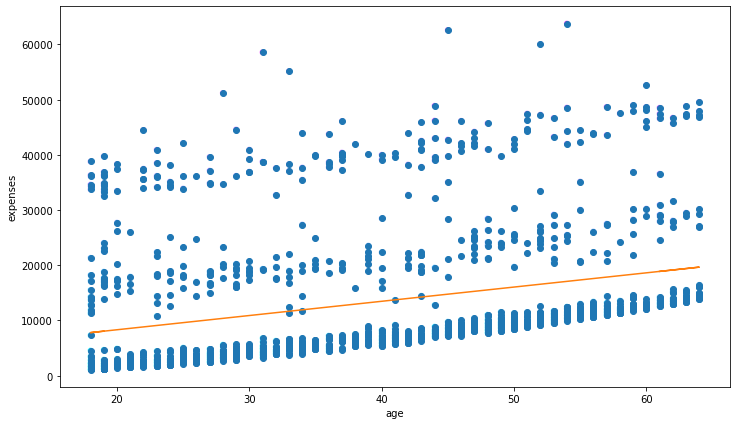

linear regression line: Slope = -1387.17, Constant = 13956.75


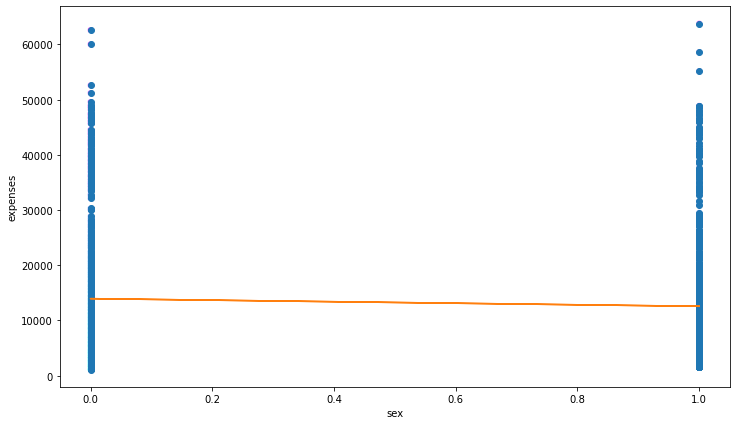

linear regression line: Slope = 394.33, Constant = 1178.18


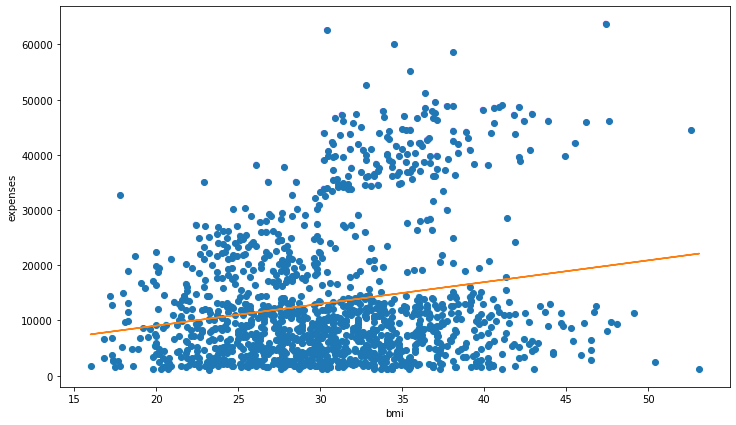

linear regression line: Slope = 683.09, Constant = 12522.50


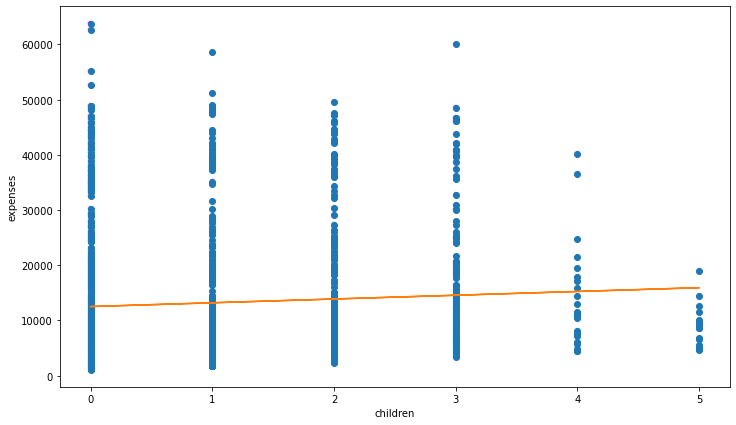

linear regression line: Slope = 23615.96, Constant = 8434.27


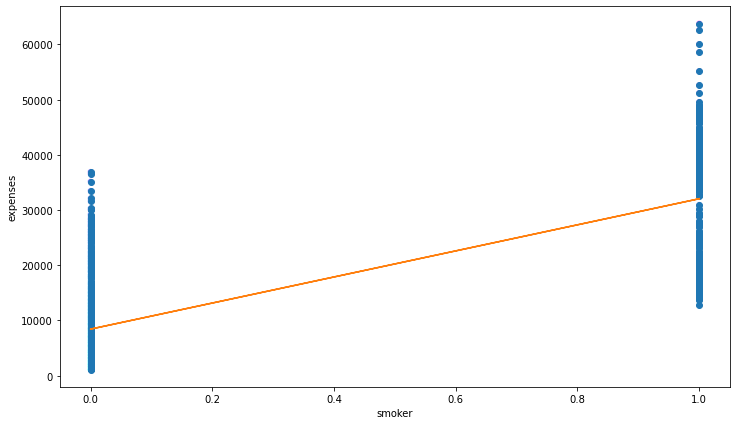

In [13]:
for i in df2.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df1, x=i, y='expenses',hue='expenses',palette='cool', legend=False)
    regression_line(df2[i], df1['expenses'])

<strong><font color = 'navy'> Observations:   
    
    From the above scatter plots, can observe the following
    1. For age column, can see linear relationship as by increasing age, the expenses are also increasing.
    2. For sex column, can see little increase in male are relatively more spending than female. 
    3. For smoker column, can see the individuals who smokes are spending more than individuals who doesn't smoke. 
    4. The other columns, children, bmi doesnt have much significant impact on the target variable. 
    5. Among all the other features, smoker is showing strong correlation with the target variable- expenses. 
    

### scatter plots of each independent variable vs dependent checking with smoker feature

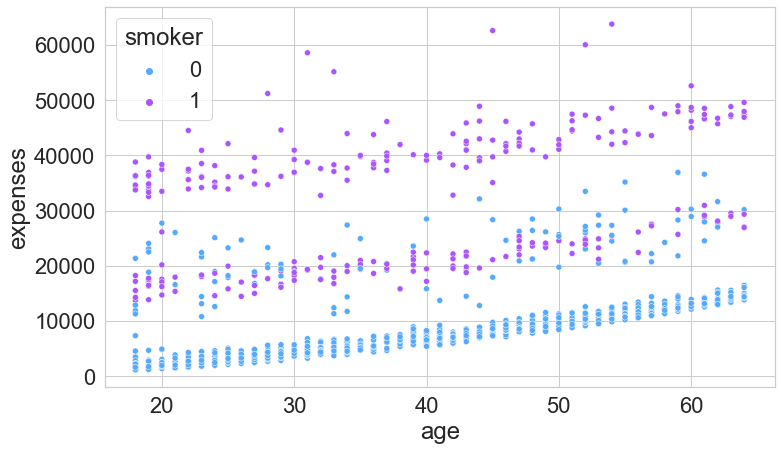

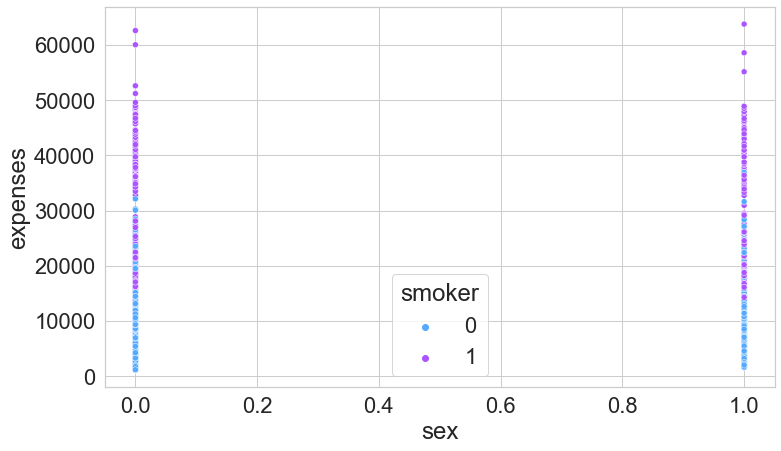

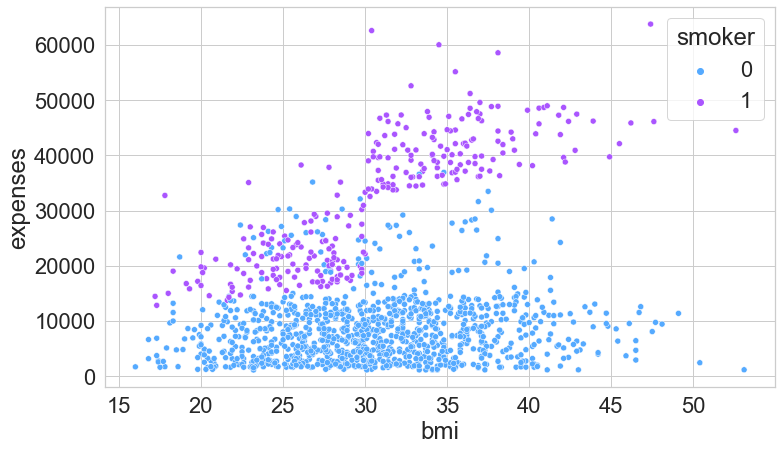

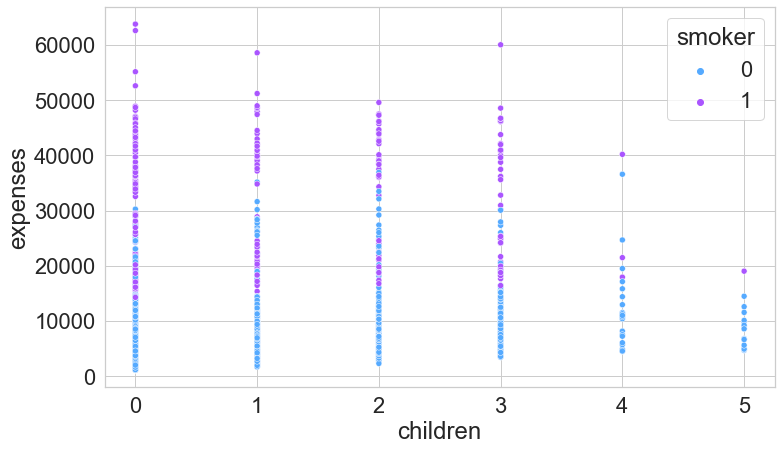

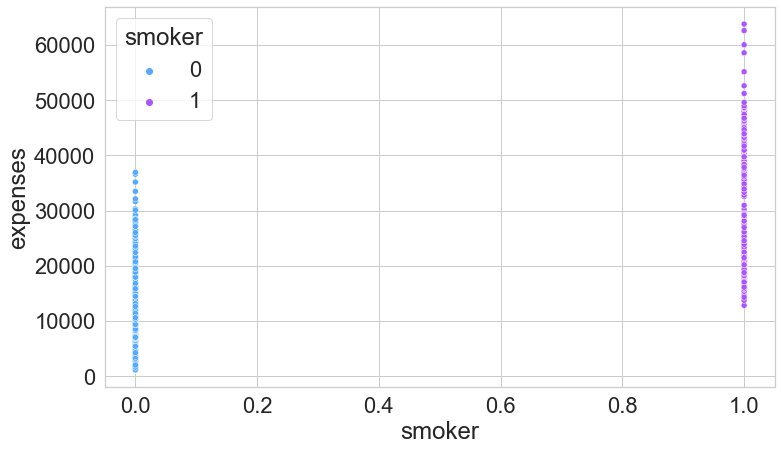

In [14]:
sns.set(font_scale=2)
sns.set_style('whitegrid')

for i in df2.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df1, x=i, y='expenses',hue='smoker',palette='cool', legend=True)

<strong><font color = 'navy'> Observations:
    
    From the above plots, can see individuals who smokes are relatively spending more than the individuals who 
    doesn't smoke in all the other plots. 
    
    Therefore, smoker feature is a strong predictor with the target variable. 

### Spliting the data for training and testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df2, df1['expenses'], random_state=11)

print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (1003, 5)
Shape of testing  set = (335, 5)


### Train the model

In [16]:
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

for i, name in enumerate(df2.columns):
    print(f'{name:}: {linear_regression.coef_[i]:20.20f}')

print()
print(f'y-intercept: {linear_regression.intercept_:23.20f}')

age: 263.08290470462179655442
sex: 263.47136321925341917449
bmi: 336.19582229376828763634
children: 552.05747556933999931061
smoker: 23525.80689345340942963958

y-intercept: -12874.35054012397449696437


### Test the model

In [17]:
import math
from sklearn import metrics

predicted = linear_regression.predict(X_test)
expected  = y_test

r2 = metrics.r2_score(expected, predicted)
r  = math.sqrt(r2)

print(f'coefficient of determination = {r2:.1f}')
print(f'     correlation coefficient = {r:.1f}')

coefficient of determination = 0.8
     correlation coefficient = 0.9


### Visualize the expected vs. predicted values

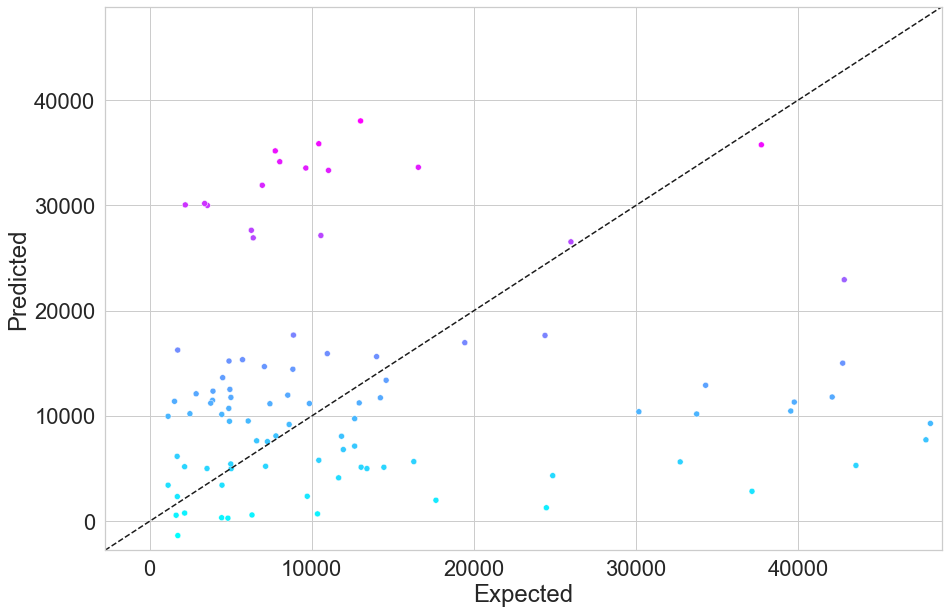

In [18]:
df = pd.DataFrame()

df['Expected']  = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(15, 10))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
                       hue='Predicted', palette='cool', 
                       legend=False)

start = min(expected.min(), predicted.min())
end   = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

<strong><font color = 'navy'> Summary:

We can see the strong correlation coefficient - 0.9  and coefficient of determination - 0.8 from the model, it shows the strong linear relationship between the independent and dependent variables. 

smoker feature plays a significant role and most influenced attribute in predicting the expenses, i.e., if the individual smokes there is increase in the expenses comparitively with the individuals who doesn't smoke. 
    
The other columns, children, bmi doesnt have much significant impact on the target variable. 
    
However, in the plot can see significant variance of predicted from expected values.